<a href="https://colab.research.google.com/github/srijanharsh/COVID_DETECTION_USING_X-RAY_IMAGES/blob/main/COVID_X_RAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://cb.lk/covid_19

--2022-04-16 09:18:42--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-04-16 09:18:43--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-04-16 09:18:43--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-0

In [2]:
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [4]:
import numpy as numpy
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [5]:
## CNN based model in keras

model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [7]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
      rescale = 1./255,
      shear_range =0.2,
      zoom_range = 0.2,
      horizontal_flip =True,     
 )

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size =32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [11]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
7/7 [==============================] - 17s 2s/step - loss: 1.5722 - accuracy: 0.5714 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 0.6511 - accuracy: 0.6205 - val_loss: 0.5782 - val_accuracy: 0.9333
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 0.4541 - accuracy: 0.8214 - val_loss: 0.4106 - val_accuracy: 0.8167
Epoch 4/10
7/7 [==============================] - 11s 2s/step - loss: 0.5741 - accuracy: 0.7411 - val_loss: 0.4651 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 0.4026 - accuracy: 0.8259 - val_loss: 0.3143 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 0.3273 - accuracy: 0.8616 - val_loss: 0.2031 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 11s 2s/step - loss: 0.2524 - accuracy: 0.8929 - val_loss: 0.1570 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

In [12]:
model.save('model_adv.h5')

In [13]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.09332921355962753, 0.9776785969734192]

In [14]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.06168830394744873, 0.9833333492279053]

In [15]:
model = load_model('model_adv.h5')

In [16]:
# Test Images

In [28]:
import os 
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [37]:

y_actual = []
y_test = []

In [38]:

for i in os.listdir("./CovidDataset/Test/Normal/"):
    img = image.load_img("./CovidDataset/Test/Normal/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = numpy.expand_dims(img,axis=0)
    p = model.predict(img)
    y_test.append(p[0,0])
    y_actual.append(1)


In [39]:
for i in os.listdir("./CovidDataset/Test/Covid/"):
    img = image.load_img("./CovidDataset/Test/Covid/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = numpy.expand_dims(img,axis=0)
    p = model.predict(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [40]:
y_actual = numpy.array(y_actual)
y_test  = numpy.array(y_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_actual, y_test)

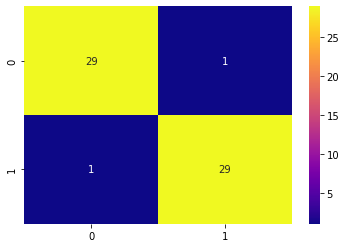

In [43]:
import seaborn as sns 
sns.heatmap(cm,cmap="plasma", annot=True)